In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
#from oe_acute import pyMNE

In [2]:
os.nice(1)

1

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/tcm2/B1240/32x32/stim_resp_32x32_128/enc_test_128.npy')
stim_resp = np.load('/mnt/cube/srrudrar/tcm2/B1240/32x32/stim_resp_32x32_128/resp_test_128.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((5706, 128), (5706, 214, 32))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 32

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((5706, 128), (5706, 214))

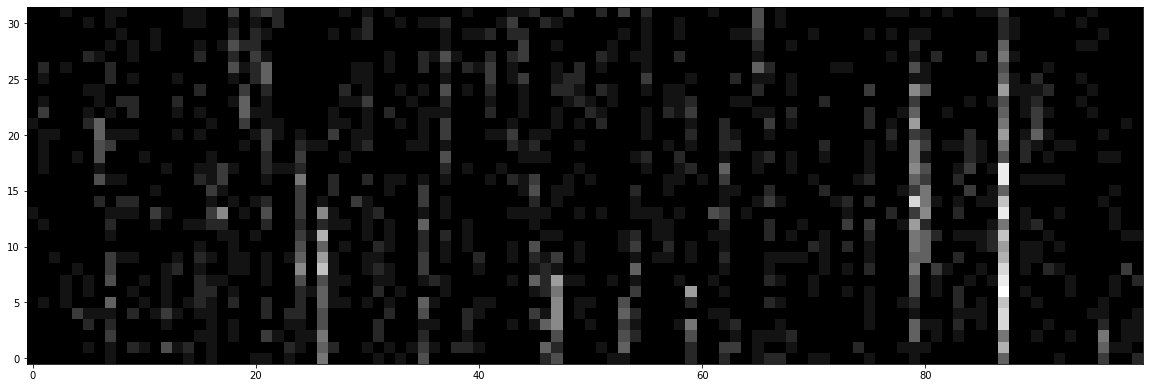

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/tcm2/B1240/32x32/stim_resp_32x32_128/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 128
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.146949
    2       0    0.147030
    3       0    0.141277
    4       0    0.139697
    5       0    0.137772
    6       0    0.135924
    7       0    0.135663
    8       0    0.134764
    9       0    0.133502
   10       0    0.130947
   11       0    0.131538
   12       1    0.131875
   13       2    0.130669
   14       0    0.131021
   15       1    0.130569
   16       0    0.130242
   17       0    0.130345
   18       1    0.130241
   19       0    0.130541
   20       1    0.130090
   21       0    0.129806
   22       0    0.129643
   23       0    0.129874
   24       1    0.130118
   25       2    0.130058
   26       3    0.129824
   27       4    0.129991
   28       5    0.129918
   29       6    0.129754
   30       7    0.129887
   31       8    0.129696
   32       9    0.129522
   33       0    0.129736
   34       1    0.130149
   35       2    0.130196
   36       3    0.129986
   37       4    0.130032
   38       

   14       3    0.111557
   15       4    0.112182
   16       5    0.112083
   17       6    0.112123
   18       7    0.112549
   19       8    0.112617
   20       9    0.113470
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.095478
    2       0    0.092412
    3       0    0.091282
    4       0    0.090055
    5       0    0.090027
    6       0    0.089250
    7       0    0.089520
    8       1    0.089080
    9       0    0.088663
   10       0    0.088955
   11       1    0.088597
   12       0    0.088654
   13       1    0.088306
   14       0    0.088286
   15       0    0.088571
   16       1    0.088331
   17       2    0.088542
   18       3    0.088405
   19       4    0.088134
   20       0    0.088128
   21       0    0.088234
   22       1    0.088259
   23       2    0.088022
   24       0    0.088161
   25       1    0.088185
   26       2    0.088717
   27       3    0.088581
   28       4    0.089046
   29       5    0.088996
   30       

Iters   tally   ll(test) 
    1       0    0.070112
    2       0    0.068768
    3       0    0.069337
    4       1    0.068743
    5       0    0.067981
    6       0    0.068187
    7       1    0.068772
    8       2    0.068187
    9       3    0.067527
   10       0    0.068570
   11       1    0.068847
   12       2    0.067789
   13       3    0.067901
   14       4    0.067794
   15       5    0.067554
   16       6    0.067795
   17       7    0.067507
   18       0    0.067842
   19       1    0.067851
   20       2    0.068703
   21       3    0.069022
   22       4    0.068641
   23       5    0.068770
   24       6    0.068972
   25       7    0.068770
   26       8    0.069059
   27       9    0.069197
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.063789
    2       0    0.062256
    3       0    0.061639
    4       0    0.060677
    5       0    0.060963
    6       1    0.060419
    7       0    0.060748
    8       1    0.062619
    9       

   10       2    0.121828
   11       3    0.122939
   12       4    0.121463
   13       5    0.121420
   14       6    0.121472
   15       7    0.121466
   16       8    0.120911
   17       9    0.120951
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.130143
    2       0    0.125794
    3       0    0.121820
    4       0    0.119604
    5       0    0.118258
    6       0    0.118278
    7       1    0.117976
    8       0    0.118548
    9       1    0.118660
   10       2    0.118375
   11       3    0.117962
   12       0    0.117989
   13       1    0.118055
   14       2    0.117836
   15       0    0.117731
   16       0    0.117654
   17       0    0.118182
   18       1    0.118575
   19       2    0.118312
   20       3    0.118752
   21       4    0.119415
   22       5    0.119537
   23       6    0.120103
   24       7    0.120179
   25       8    0.119942
   26       9    0.119916
minimum of test set found
Iters   tally   ll(test) 
    1       

    1       0    0.104281
    2       0    0.101150
    3       0    0.105527
    4       1    0.104798
    5       2    0.100523
    6       0    0.099738
    7       0    0.098780
    8       0    0.098051
    9       0    0.099552
   10       1    0.098264
   11       2    0.099389
   12       3    0.102380
   13       4    0.104283
   14       5    0.103254
   15       6    0.105781
   16       7    0.105749
   17       8    0.103898
   18       9    0.104588
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.108709
    2       0    0.107001
    3       0    0.109051
    4       1    0.110961
    5       2    0.106515
    6       0    0.105466
    7       0    0.107084
    8       1    0.105935
    9       2    0.104498
   10       0    0.106159
   11       1    0.105518
   12       2    0.103336
   13       0    0.104261
   14       1    0.106322
   15       2    0.105071
   16       3    0.105358
   17       4    0.105860
   18       5    0.106684
   19       

    7       0    0.614580
    8       0    0.614079
    9       0    0.613832
   10       0    0.613807
   11       0    0.613861
   12       1    0.613756
   13       0    0.613656
   14       0    0.613953
   15       1    0.613959
   16       2    0.613863
   17       3    0.613982
   18       4    0.614119
   19       5    0.614089
   20       6    0.614860
   21       7    0.615541
   22       8    0.615687
   23       9    0.615924
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.625933
    2       0    0.621071
    3       0    0.616786
    4       0    0.615671
    5       0    0.612358
    6       0    0.611609
    7       0    0.609329
    8       0    0.608576
    9       0    0.608542
   10       0    0.608548
   11       1    0.607465
   12       0    0.606492
   13       0    0.606345
   14       0    0.606195
   15       0    0.607871
   16       1    0.609274
   17       2    0.611639
   18       3    0.612490
   19       4    0.613487
   20       

    1       0    0.447918
    2       0    0.443572
    3       0    0.443023
    4       0    0.442209
    5       0    0.439226
    6       0    0.439261
    7       1    0.439585
    8       2    0.437881
    9       0    0.437332
   10       0    0.436529
   11       0    0.437573
   12       1    0.438007
   13       2    0.437037
   14       3    0.437559
   15       4    0.437998
   16       5    0.437169
   17       6    0.436443
   18       0    0.436613
   19       1    0.436925
   20       2    0.437249
   21       3    0.436799
   22       4    0.436806
   23       5    0.436828
   24       6    0.436574
   25       7    0.436941
   26       8    0.438090
   27       9    0.439007
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.437990
    2       0    0.429622
    3       0    0.428053
    4       0    0.426221
    5       0    0.425194
    6       0    0.424962
    7       0    0.424756
    8       0    0.425041
    9       1    0.425800
   10       

    5       2    0.100574
    6       3    0.101543
    7       4    0.104797
    8       5    0.105675
    9       6    0.103889
   10       7    0.103921
   11       8    0.104060
   12       9    0.103804
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.049981
    2       0    0.050307
    3       0    0.046709
    4       0    0.046967
    5       1    0.048029
    6       2    0.048368
    7       3    0.048762
    8       4    0.048668
    9       5    0.049484
   10       6    0.051429
   11       7    0.051472
   12       8    0.051289
   13       9    0.051296
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.072813
    2       0    0.077800
    3       0    0.080465
    4       1    0.079159
    5       2    0.078230
    6       3    0.079622
    7       4    0.079550
    8       5    0.079048
    9       6    0.082754
   10       7    0.087128
   11       8    0.087866
   12       9    0.093606
minimum of test set found
Iters   tall

    9       0    0.143087
   10       1    0.143348
   11       2    0.143279
   12       3    0.143394
   13       4    0.143595
   14       5    0.142838
   15       6    0.143426
   16       7    0.143406
   17       8    0.143758
   18       9    0.143942
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.059451
    2       0    0.055107
    3       0    0.054443
    4       0    0.051236
    5       0    0.050140
    6       0    0.050489
    7       1    0.049932
    8       0    0.049701
    9       0    0.049848
   10       1    0.049805
   11       2    0.049877
   12       3    0.049654
   13       0    0.049736
   14       1    0.049998
   15       2    0.050096
   16       3    0.049905
   17       4    0.050093
   18       5    0.050296
   19       6    0.050075
   20       7    0.050462
   21       8    0.050914
   22       9    0.050652
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.051146
    2       0    0.049930
    3       

   10       0    0.240727
   11       1    0.240166
   12       0    0.239815
   13       0    0.240092
   14       1    0.240534
   15       2    0.243491
   16       3    0.244964
   17       4    0.244103
   18       5    0.243858
   19       6    0.243162
   20       7    0.242867
   21       8    0.242747
   22       9    0.242448
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.242119
    2       0    0.239633
    3       0    0.237452
    4       0    0.235956
    5       0    0.235969
    6       1    0.233864
    7       0    0.233221
    8       0    0.232993
    9       0    0.232831
   10       0    0.232619
   11       0    0.232304
   12       0    0.231713
   13       0    0.232335
   14       1    0.231762
   15       2    0.231479
   16       0    0.231475
   17       0    0.231228
   18       0    0.231109
   19       0    0.230947
   20       0    0.231397
   21       1    0.231917
   22       2    0.232202
   23       3    0.232789
   24       

   30       9    0.098593
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.121353
    2       0    0.120895
    3       0    0.120013
    4       0    0.120810
    5       1    0.122009
    6       2    0.121896
    7       3    0.121673
    8       4    0.121743
    9       5    0.121154
   10       6    0.120933
   11       7    0.120718
   12       8    0.120334
   13       9    0.120390
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.112662
    2       0    0.111682
    3       0    0.111137
    4       0    0.111643
    5       1    0.110692
    6       0    0.109789
    7       0    0.110125
    8       1    0.109961
    9       2    0.109506
   10       0    0.109285
   11       0    0.109015
   12       0    0.109438
   13       1    0.109400
   14       2    0.108934
   15       0    0.109067
   16       1    0.109101
   17       2    0.108909
   18       0    0.108974
   19       1    0.109122
   20       2    0.110740
   21       

   23       5    0.221594
   24       0    0.222312
   25       1    0.222414
   26       2    0.221882
   27       3    0.221636
   28       4    0.221814
   29       5    0.222741
   30       6    0.223487
   31       7    0.223204
   32       8    0.222468
   33       9    0.222430
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.246484
    2       0    0.239793
    3       0    0.233009
    4       0    0.228391
    5       0    0.226907
    6       0    0.225938
    7       0    0.225699
    8       0    0.223354
    9       0    0.222130
   10       0    0.220923
   11       0    0.220235
   12       0    0.219868
   13       0    0.219169
   14       0    0.219063
   15       0    0.219126
   16       1    0.218669
   17       0    0.218994
   18       1    0.219603
   19       2    0.219231
   20       3    0.219083
   21       4    0.219355
   22       5    0.219593
   23       6    0.219130
   24       7    0.219089
   25       8    0.220538
   26       

   23       4    0.137410
   24       5    0.137881
   25       6    0.139055
   26       7    0.138570
   27       8    0.139647
   28       9    0.141849
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.163839
    2       0    0.167149
    3       0    0.164597
    4       0    0.162437
    5       0    0.160600
    6       0    0.158994
    7       0    0.159882
    8       1    0.158023
    9       0    0.158212
   10       1    0.158411
   11       2    0.158049
   12       3    0.157912
   13       0    0.158310
   14       1    0.157550
   15       0    0.157514
   16       0    0.158021
   17       1    0.158026
   18       2    0.158384
   19       3    0.158123
   20       4    0.157425
   21       0    0.157768
   22       1    0.158506
   23       2    0.158434
   24       3    0.158534
   25       4    0.158953
   26       5    0.159372
   27       6    0.159462
   28       7    0.160048
   29       8    0.160991
   30       9    0.162298
minimum of t

    3       0    0.154580
    4       1    0.146541
    5       0    0.144795
    6       0    0.143541
    7       0    0.142749
    8       0    0.143234
    9       1    0.143252
   10       2    0.142549
   11       0    0.142122
   12       0    0.143756
   13       1    0.144068
   14       2    0.142233
   15       3    0.141672
   16       0    0.141646
   17       0    0.141465
   18       0    0.141909
   19       1    0.141618
   20       2    0.140888
   21       0    0.140907
   22       1    0.140351
   23       0    0.140816
   24       1    0.141357
   25       2    0.140744
   26       3    0.140893
   27       4    0.141960
   28       5    0.141958
   29       6    0.142472
   30       7    0.142377
   31       8    0.142509
   32       9    0.142527
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.602868
    2       0    0.597447
    3       0    0.593396
    4       0    0.593807
    5       1    0.592002
    6       0    0.590561
    7       

   17       4    0.139823
   18       5    0.139407
   19       6    0.138890
   20       7    0.139192
   21       8    0.139379
   22       9    0.142331
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.154684
    2       0    0.147373
    3       0    0.146493
    4       0    0.146644
    5       1    0.145228
    6       0    0.144999
    7       0    0.143104
    8       0    0.142341
    9       0    0.142212
   10       0    0.141863
   11       0    0.141871
   12       1    0.141770
   13       0    0.141506
   14       0    0.141337
   15       0    0.141127
   16       0    0.141206
   17       1    0.141908
   18       2    0.142987
   19       3    0.142586
   20       4    0.142282
   21       5    0.142437
   22       6    0.142532
   23       7    0.142335
   24       8    0.142492
   25       9    0.142578
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.146782
    2       0    0.144164
    3       0    0.143607
    4       

    3       0    0.461686
    4       0    0.460107
    5       0    0.458933
    6       0    0.458032
    7       0    0.456855
    8       0    0.456620
    9       0    0.456352
   10       0    0.455734
   11       0    0.454092
   12       0    0.453302
   13       0    0.453702
   14       1    0.453662
   15       2    0.453601
   16       3    0.453527
   17       4    0.453422
   18       5    0.453061
   19       0    0.453065
   20       1    0.453198
   21       2    0.452655
   22       0    0.453044
   23       1    0.453277
   24       2    0.453054
   25       3    0.452738
   26       4    0.452374
   27       0    0.452424
   28       1    0.452633
   29       2    0.452639
   30       3    0.452821
   31       4    0.452305
   32       0    0.453743
   33       1    0.455443
   34       2    0.457000
   35       3    0.457083
   36       4    0.457445
   37       5    0.457489
   38       6    0.457671
   39       7    0.457721
   40       8    0.457803
   41       

   18       3    0.628743
   19       4    0.629026
   20       5    0.628810
   21       6    0.628631
   22       7    0.628815
   23       8    0.628916
   24       9    0.628710
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.647174
    2       0    0.642683
    3       0    0.640163
    4       0    0.639903
    5       0    0.637594
    6       0    0.636111
    7       0    0.635312
    8       0    0.635815
    9       1    0.634373
   10       0    0.634830
   11       1    0.635038
   12       2    0.634853
   13       3    0.634440
   14       4    0.635148
   15       5    0.635587
   16       6    0.635303
   17       7    0.635630
   18       8    0.635929
   19       9    0.635691
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.167802
    2       0    0.165979
    3       0    0.165127
    4       0    0.162024
    5       0    0.160424
    6       0    0.158903
    7       0    0.158021
    8       0    0.158276
    9       

   23       9    0.381317
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.404685
    2       0    0.395512
    3       0    0.395244
    4       0    0.394423
    5       0    0.390710
    6       0    0.389468
    7       0    0.387792
    8       0    0.388429
    9       1    0.387675
   10       0    0.387173
   11       0    0.388234
   12       1    0.388930
   13       2    0.386995
   14       0    0.386704
   15       0    0.387198
   16       1    0.386770
   17       2    0.386203
   18       0    0.386428
   19       1    0.386550
   20       2    0.386393
   21       3    0.387078
   22       4    0.386591
   23       5    0.386355
   24       6    0.386928
   25       7    0.387324
   26       8    0.386761
   27       9    0.386843
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.406363
    2       0    0.401166
    3       0    0.396648
    4       0    0.397144
    5       1    0.393765
    6       0    0.391886
    7       

    7       1    0.175284
    8       0    0.175146
    9       0    0.175945
   10       1    0.177072
   11       2    0.175807
   12       3    0.175845
   13       4    0.175998
   14       5    0.175672
   15       6    0.175321
   16       7    0.176010
   17       8    0.176451
   18       9    0.175595
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.192522
    2       0    0.189238
    3       0    0.188255
    4       0    0.189732
    5       1    0.188067
    6       0    0.186499
    7       0    0.185868
    8       0    0.184832
    9       0    0.183928
   10       0    0.184320
   11       1    0.184113
   12       2    0.183839
   13       0    0.184102
   14       1    0.184248
   15       2    0.183943
   16       3    0.183595
   17       0    0.184321
   18       1    0.184710
   19       2    0.184232
   20       3    0.185274
   21       4    0.185982
   22       5    0.186390
   23       6    0.186659
   24       7    0.186834
   25       

   17       3    0.088165
   18       4    0.088191
   19       5    0.088504
   20       6    0.088089
   21       7    0.087801
   22       8    0.087801
   23       9    0.088117
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.091964
    2       0    0.088547
    3       0    0.087146
    4       0    0.085968
    5       0    0.084484
    6       0    0.083914
    7       0    0.085114
    8       1    0.085997
    9       2    0.084873
   10       3    0.084649
   11       4    0.084816
   12       5    0.084896
   13       6    0.085106
   14       7    0.085745
   15       8    0.085371
   16       9    0.084801
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.356488
    2       0    0.355436
    3       0    0.352853
    4       0    0.352182
    5       0    0.350516
    6       0    0.348476
    7       0    0.347418
    8       0    0.346746
    9       0    0.346637
   10       0    0.346811
   11       1    0.346822
   12       

   12       0    0.157586
   13       0    0.158083
   14       1    0.157796
   15       2    0.158119
   16       3    0.159124
   17       4    0.159349
   18       5    0.160614
   19       6    0.161260
   20       7    0.161413
   21       8    0.161518
   22       9    0.161332
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.427550
    2       0    0.427320
    3       0    0.424205
    4       0    0.422858
    5       0    0.423251
    6       1    0.424715
    7       2    0.425800
    8       3    0.423906
    9       4    0.423331
   10       5    0.422686
   11       0    0.422755
   12       1    0.422097
   13       0    0.422131
   14       1    0.422063
   15       0    0.422081
   16       1    0.422228
   17       2    0.422114
   18       3    0.422668
   19       4    0.423267
   20       5    0.422754
   21       6    0.422542
   22       7    0.422468
   23       8    0.422566
   24       9    0.423114
minimum of test set found
Iters   tall

    4       0    0.206223
    5       0    0.206197
    6       0    0.204839
    7       0    0.201851
    8       0    0.200896
    9       0    0.199633
   10       0    0.200698
   11       1    0.201315
   12       2    0.199292
   13       0    0.198772
   14       0    0.198779
   15       1    0.199245
   16       2    0.200763
   17       3    0.200865
   18       4    0.200405
   19       5    0.201546
   20       6    0.201802
   21       7    0.201801
   22       8    0.200908
   23       9    0.200637
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.486950
    2       0    0.484530
    3       0    0.478927
    4       0    0.476017
    5       0    0.474285
    6       0    0.473955
    7       0    0.473488
    8       0    0.472617
    9       0    0.472369
   10       0    0.471570
   11       0    0.471513
   12       0    0.471552
   13       1    0.471387
   14       0    0.471897
   15       1    0.471745
   16       2    0.471241
   17       

   19       2    0.536576
   20       3    0.536693
   21       4    0.536876
   22       5    0.537477
   23       6    0.537362
   24       7    0.537590
   25       8    0.537639
   26       9    0.537539
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.665783
    2       0    0.663519
    3       0    0.661589
    4       0    0.659428
    5       0    0.658637
    6       0    0.656578
    7       0    0.656041
    8       0    0.655232
    9       0    0.654155
   10       0    0.653824
   11       0    0.653825
   12       1    0.654591
   13       2    0.654705
   14       3    0.654913
   15       4    0.654549
   16       5    0.654853
   17       6    0.654905
   18       7    0.655136
   19       8    0.655372
   20       9    0.655561
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.657894
    2       0    0.657674
    3       0    0.652051
    4       0    0.648834
    5       0    0.647302
    6       0    0.647001
    7       

    6       0    0.643426
    7       0    0.641820
    8       0    0.641473
    9       0    0.640679
   10       0    0.640119
   11       0    0.639983
   12       0    0.640312
   13       1    0.640670
   14       2    0.640900
   15       3    0.640303
   16       4    0.639856
   17       0    0.639621
   18       0    0.639675
   19       1    0.639405
   20       0    0.638929
   21       0    0.639031
   22       1    0.639027
   23       2    0.638849
   24       0    0.638882
   25       1    0.639163
   26       2    0.639408
   27       3    0.639501
   28       4    0.639240
   29       5    0.639164
   30       6    0.639347
   31       7    0.639294
   32       8    0.639247
   33       9    0.640238
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.565199
    2       0    0.559030
    3       0    0.553720
    4       0    0.548975
    5       0    0.547527
    6       0    0.546060
    7       0    0.545000
    8       0    0.544133
    9       

    2       0    0.186857
    3       0    0.185409
    4       0    0.181667
    5       0    0.180667
    6       0    0.180349
    7       0    0.178595
    8       0    0.177647
    9       0    0.178117
   10       1    0.177192
   11       0    0.177520
   12       1    0.177911
   13       2    0.177249
   14       3    0.177644
   15       4    0.178009
   16       5    0.178553
   17       6    0.178916
   18       7    0.178373
   19       8    0.178315
   20       9    0.179334
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.268715
    2       0    0.264582
    3       0    0.269499
    4       1    0.268016
    5       2    0.261383
    6       0    0.259858
    7       0    0.260426
    8       1    0.259340
    9       0    0.258486
   10       0    0.259950
   11       1    0.260028
   12       2    0.261983
   13       3    0.261953
   14       4    0.260798
   15       5    0.260218
   16       6    0.260738
   17       7    0.260128
   18       

    1       0    0.589536
    2       0    0.587129
    3       0    0.581459
    4       0    0.582356
    5       1    0.581021
    6       0    0.582967
    7       1    0.582482
    8       2    0.580704
    9       0    0.580361
   10       0    0.578644
   11       0    0.577134
   12       0    0.577521
   13       1    0.577294
   14       2    0.576912
   15       0    0.576835
   16       0    0.576163
   17       0    0.576008
   18       0    0.576677
   19       1    0.577025
   20       2    0.576489
   21       3    0.576377
   22       4    0.576724
   23       5    0.576926
   24       6    0.577190
   25       7    0.578487
   26       8    0.579149
   27       9    0.578943
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.314936
    2       0    0.313461
    3       0    0.311683
    4       0    0.307640
    5       0    0.307013
    6       0    0.305741
    7       0    0.305035
    8       0    0.304201
    9       0    0.304807
   10       

   18       5    0.184939
   19       6    0.184887
   20       7    0.184763
   21       8    0.184558
   22       9    0.184702
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.195419
    2       0    0.193947
    3       0    0.193480
    4       0    0.193874
    5       1    0.190638
    6       0    0.190649
    7       1    0.189403
    8       0    0.188853
    9       0    0.189523
   10       1    0.189621
   11       2    0.188575
   12       0    0.188368
   13       0    0.188667
   14       1    0.188506
   15       2    0.188320
   16       0    0.188549
   17       1    0.188425
   18       2    0.188338
   19       3    0.188881
   20       4    0.188786
   21       5    0.188531
   22       6    0.188314
   23       0    0.188426
   24       1    0.188463
   25       2    0.188705
   26       3    0.188981
   27       4    0.189271
   28       5    0.189920
   29       6    0.190724
   30       7    0.191478
   31       8    0.191208
   32       

    8       1    0.223789
    9       2    0.219893
   10       0    0.218638
   11       0    0.218285
   12       0    0.218087
   13       0    0.217433
   14       0    0.217058
   15       0    0.217758
   16       1    0.218181
   17       2    0.217387
   18       3    0.217017
   19       0    0.216972
   20       0    0.217572
   21       1    0.217673
   22       2    0.217450
   23       3    0.217338
   24       4    0.217134
   25       5    0.217809
   26       6    0.218463
   27       7    0.218178
   28       8    0.218762
   29       9    0.219271
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.238798
    2       0    0.236902
    3       0    0.237593
    4       1    0.236054
    5       0    0.234883
    6       0    0.234334
    7       0    0.233649
    8       0    0.236019
    9       1    0.235190
   10       2    0.232774
   11       0    0.232344
   12       0    0.230967
   13       0    0.231329
   14       1    0.231337
   15       

   13       2    0.236553
   14       0    0.236652
   15       1    0.236552
   16       0    0.236594
   17       1    0.237052
   18       2    0.236985
   19       3    0.236746
   20       4    0.237073
   21       5    0.237643
   22       6    0.237938
   23       7    0.239447
   24       8    0.239592
   25       9    0.239200
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.236089
    2       0    0.235700
    3       0    0.235516
    4       0    0.234306
    5       0    0.233666
    6       0    0.233316
    7       0    0.232883
    8       0    0.232511
    9       0    0.232525
   10       1    0.232399
   11       0    0.232382
   12       0    0.232305
   13       0    0.232209
   14       0    0.232215
   15       1    0.232373
   16       2    0.233184
   17       3    0.234103
   18       4    0.234422
   19       5    0.234410
   20       6    0.234430
   21       7    0.234388
   22       8    0.234483
   23       9    0.234536
minimum of t

    5       0    0.076675
    6       0    0.076923
    7       1    0.077439
    8       2    0.076312
    9       0    0.075927
   10       0    0.076280
   11       1    0.076412
   12       2    0.076274
   13       3    0.076325
   14       4    0.076500
   15       5    0.076485
   16       6    0.076456
   17       7    0.076498
   18       8    0.076643
   19       9    0.076723
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.090648
    2       0    0.088561
    3       0    0.089499
    4       1    0.090910
    5       2    0.089997
    6       3    0.088855
    7       4    0.088949
    8       5    0.088274
    9       0    0.087993
   10       0    0.087885
   11       0    0.087647
   12       0    0.087613
   13       0    0.088009
   14       1    0.088185
   15       2    0.088063
   16       3    0.088254
   17       4    0.088795
   18       5    0.089039
   19       6    0.089175
   20       7    0.088909
   21       8    0.088845
   22       

   20       7    0.143267
   21       8    0.143748
   22       9    0.143584
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.145198
    2       0    0.143508
    3       0    0.145901
    4       1    0.146497
    5       2    0.144603
    6       3    0.141205
    7       0    0.141164
    8       0    0.140210
    9       0    0.140191
   10       0    0.139023
   11       0    0.138346
   12       0    0.138143
   13       0    0.138530
   14       1    0.138415
   15       2    0.137786
   16       0    0.138260
   17       1    0.138684
   18       2    0.138448
   19       3    0.138372
   20       4    0.138473
   21       5    0.138565
   22       6    0.138234
   23       7    0.138062
   24       8    0.138276
   25       9    0.138480
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.143497
    2       0    0.141719
    3       0    0.140406
    4       0    0.138977
    5       0    0.137796
    6       0    0.138017
    7       

   17       0    0.178027
   18       0    0.177769
   19       0    0.177732
   20       0    0.177656
   21       0    0.177533
   22       0    0.177543
   23       1    0.178053
   24       2    0.179564
   25       3    0.180061
   26       4    0.179846
   27       5    0.180308
   28       6    0.180399
   29       7    0.180428
   30       8    0.180257
   31       9    0.180281
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.191565
    2       0    0.189356
    3       0    0.186125
    4       0    0.184865
    5       0    0.183458
    6       0    0.182937
    7       0    0.182727
    8       0    0.182335
    9       0    0.182311
   10       0    0.182440
   11       1    0.182374
   12       2    0.182317
   13       3    0.181989
   14       0    0.181671
   15       0    0.181634
   16       0    0.181509
   17       0    0.181393
   18       0    0.181134
   19       0    0.180990
   20       0    0.181028
   21       1    0.181374
   22       

   31       0    0.539527
   32       1    0.539737
   33       2    0.540458
   34       3    0.541428
   35       4    0.543139
   36       5    0.544142
   37       6    0.544056
   38       7    0.544237
   39       8    0.544216
   40       9    0.544105
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.551165
    2       0    0.547415
    3       0    0.544133
    4       0    0.541983
    5       0    0.540331
    6       0    0.539212
    7       0    0.538488
    8       0    0.537823
    9       0    0.537880
   10       1    0.537701
   11       0    0.537362
   12       0    0.537305
   13       0    0.537322
   14       1    0.537053
   15       0    0.536740
   16       0    0.537126
   17       1    0.537134
   18       2    0.536479
   19       0    0.536582
   20       1    0.537039
   21       2    0.536973
   22       3    0.537510
   23       4    0.537613
   24       5    0.537255
   25       6    0.537115
   26       7    0.537411
   27       

   19       9    0.444028
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.455773
    2       0    0.448577
    3       0    0.443847
    4       0    0.444758
    5       1    0.440618
    6       0    0.441813
    7       1    0.438986
    8       0    0.437674
    9       0    0.438452
   10       1    0.437622
   11       0    0.440406
   12       1    0.439102
   13       2    0.439557
   14       3    0.440198
   15       4    0.438973
   16       5    0.439579
   17       6    0.439736
   18       7    0.438699
   19       8    0.438884
   20       9    0.439578
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.455940
    2       0    0.446812
    3       0    0.443652
    4       0    0.442253
    5       0    0.439642
    6       0    0.438629
    7       0    0.438632
    8       1    0.439308
    9       2    0.438670
   10       3    0.439458
   11       4    0.439928
   12       5    0.441239
   13       6    0.441435
   14       

   22       8    0.070694
   23       9    0.070657
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.088683
    2       0    0.086821
    3       0    0.085874
    4       0    0.085235
    5       0    0.086075
    6       1    0.085102
    7       0    0.084363
    8       0    0.084038
    9       0    0.083668
   10       0    0.084135
   11       1    0.083998
   12       2    0.084403
   13       3    0.084888
   14       4    0.084560
   15       5    0.084480
   16       6    0.084284
   17       7    0.084486
   18       8    0.084753
   19       9    0.084720
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.092190
    2       0    0.091683
    3       0    0.091388
    4       0    0.091157
    5       0    0.091797
    6       1    0.091998
    7       2    0.091177
    8       3    0.089788
    9       0    0.089532
   10       0    0.089342
   11       0    0.089908
   12       1    0.090214
   13       2    0.090823
   14       

   21       0    0.580157
   22       0    0.579892
   23       0    0.579949
   24       1    0.580001
   25       2    0.580061
   26       3    0.580098
   27       4    0.580156
   28       5    0.580661
   29       6    0.580792
   30       7    0.581301
   31       8    0.581554
   32       9    0.581767
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.595399
    2       0    0.586273
    3       0    0.585640
    4       0    0.583614
    5       0    0.582877
    6       0    0.581965
    7       0    0.581866
    8       0    0.581133
    9       0    0.579523
   10       0    0.578993
   11       0    0.578896
   12       0    0.578564
   13       0    0.578531
   14       0    0.578581
   15       1    0.579486
   16       2    0.578700
   17       3    0.578259
   18       0    0.578180
   19       0    0.578161
   20       0    0.579005
   21       1    0.579301
   22       2    0.579138
   23       3    0.579110
   24       4    0.578996
   25       

    7       0    0.044364
    8       0    0.044256
    9       0    0.044302
   10       1    0.044054
   11       0    0.043823
   12       0    0.043839
   13       1    0.043749
   14       0    0.043721
   15       0    0.043701
   16       0    0.043509
   17       0    0.043604
   18       1    0.043984
   19       2    0.044597
   20       3    0.044679
   21       4    0.044369
   22       5    0.044138
   23       6    0.044091
   24       7    0.044416
   25       8    0.045068
   26       9    0.045214
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.050678
    2       0    0.048415
    3       0    0.047916
    4       0    0.047601
    5       0    0.047002
    6       0    0.046943
    7       0    0.046859
    8       0    0.047075
    9       1    0.047016
   10       2    0.046983
   11       3    0.046893
   12       4    0.046643
   13       0    0.046540
   14       0    0.046587
   15       1    0.046611
   16       2    0.046624
   17       

    6       0    0.203580
    7       1    0.204029
    8       2    0.202571
    9       0    0.201684
   10       0    0.201007
   11       0    0.200065
   12       0    0.199229
   13       0    0.198807
   14       0    0.198368
   15       0    0.198289
   16       0    0.198257
   17       0    0.198252
   18       0    0.198102
   19       0    0.198038
   20       0    0.198224
   21       1    0.198487
   22       2    0.198683
   23       3    0.199115
   24       4    0.199385
   25       5    0.199676
   26       6    0.200171
   27       7    0.200347
   28       8    0.200515
   29       9    0.200810
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.216762
    2       0    0.213617
    3       0    0.208435
    4       0    0.209093
    5       1    0.207228
    6       0    0.204747
    7       0    0.204338
    8       0    0.203879
    9       0    0.202392
   10       0    0.202170
   11       0    0.202715
   12       1    0.201536
   13       

    1       0    0.519839
    2       0    0.515981
    3       0    0.505230
    4       0    0.502007
    5       0    0.495982
    6       0    0.496872
    7       1    0.496553
    8       2    0.492595
    9       0    0.490917
   10       0    0.491264
   11       1    0.489476
   12       0    0.489542
   13       1    0.488931
   14       0    0.487995
   15       0    0.488222
   16       1    0.489229
   17       2    0.490812
   18       3    0.487856
   19       0    0.490490
   20       1    0.490955
   21       2    0.489864
   22       3    0.489304
   23       4    0.489419
   24       5    0.490112
   25       6    0.491131
   26       7    0.491116
   27       8    0.491126
   28       9    0.491167
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.511770
    2       0    0.505684
    3       0    0.496404
    4       0    0.490042
    5       0    0.488861
    6       0    0.485880
    7       0    0.484471
    8       0    0.483888
    9       

    1       0    0.137352
    2       0    0.131162
    3       0    0.132900
    4       1    0.128456
    5       0    0.126338
    6       0    0.128682
    7       1    0.127345
    8       2    0.124853
    9       0    0.124199
   10       0    0.124181
   11       0    0.124204
   12       1    0.123409
   13       0    0.123753
   14       1    0.123973
   15       2    0.123407
   16       0    0.123727
   17       1    0.123552
   18       2    0.123707
   19       3    0.124632
   20       4    0.124211
   21       5    0.123984
   22       6    0.124803
   23       7    0.124683
   24       8    0.125051
   25       9    0.126562
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.149376
    2       0    0.144365
    3       0    0.143585
    4       0    0.141955
    5       0    0.137889
    6       0    0.137571
    7       0    0.135956
    8       0    0.135232
    9       0    0.135643
   10       1    0.136428
   11       2    0.137504
   12       

   21       0    0.177998
   22       1    0.177907
   23       2    0.177686
   24       3    0.177711
   25       4    0.177681
   26       5    0.178198
   27       6    0.178687
   28       7    0.180947
   29       8    0.182817
   30       9    0.184172
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.067385
    2       0    0.064525
    3       0    0.063865
    4       0    0.063319
    5       0    0.065196
    6       1    0.062429
    7       0    0.060740
    8       0    0.061520
    9       1    0.061917
   10       2    0.060570
   11       0    0.060713
   12       1    0.061784
   13       2    0.060748
   14       3    0.060996
   15       4    0.060787
   16       5    0.061346
   17       6    0.062193
   18       7    0.061782
   19       8    0.062260
   20       9    0.062214
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.075108
    2       0    0.074992
    3       0    0.076117
    4       1    0.076344
    5       

   15       1    0.151846
   16       2    0.151550
   17       0    0.151856
   18       1    0.151805
   19       2    0.151349
   20       0    0.151437
   21       1    0.152007
   22       2    0.152738
   23       3    0.152280
   24       4    0.152319
   25       5    0.152476
   26       6    0.152531
   27       7    0.152401
   28       8    0.152488
   29       9    0.152834
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.169977
    2       0    0.171386
    3       0    0.169878
    4       0    0.167817
    5       0    0.167209
    6       0    0.165962
    7       0    0.165738
    8       0    0.165508
    9       0    0.165941
   10       1    0.166323
   11       2    0.165843
   12       3    0.166142
   13       4    0.167296
   14       5    0.169547
   15       6    0.172510
   16       7    0.173451
   17       8    0.175142
   18       9    0.175235
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.165520
    2       

    3       0    0.229670
    4       0    0.227335
    5       0    0.224504
    6       0    0.223786
    7       0    0.223497
    8       0    0.223849
    9       1    0.223829
   10       2    0.224627
   11       3    0.223445
   12       0    0.223809
   13       1    0.223676
   14       2    0.223076
   15       0    0.222972
   16       0    0.223131
   17       1    0.223699
   18       2    0.224255
   19       3    0.224101
   20       4    0.223930
   21       5    0.223623
   22       6    0.223536
   23       7    0.223229
   24       8    0.223745
   25       9    0.223942
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.245081
    2       0    0.244885
    3       0    0.242251
    4       0    0.241230
    5       0    0.240921
    6       0    0.240886
    7       0    0.239572
    8       0    0.238801
    9       0    0.238641
   10       0    0.238858
   11       1    0.238089
   12       0    0.236665
   13       0    0.236618
   14       

    1       0    0.162674
    2       0    0.156766
    3       0    0.153100
    4       0    0.152186
    5       0    0.151708
    6       0    0.149523
    7       0    0.149274
    8       0    0.151356
    9       1    0.150019
   10       2    0.149071
   11       0    0.148963
   12       0    0.149558
   13       1    0.148639
   14       0    0.149352
   15       1    0.152980
   16       2    0.153300
   17       3    0.151496
   18       4    0.151489
   19       5    0.152707
   20       6    0.153307
   21       7    0.152765
   22       8    0.153266
   23       9    0.153136
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.138680
    2       0    0.136816
    3       0    0.135549
    4       0    0.134847
    5       0    0.133182
    6       0    0.132489
    7       0    0.132050
    8       0    0.131495
    9       0    0.131310
   10       0    0.130204
   11       0    0.130889
   12       1    0.131859
   13       2    0.131244
   14       

   22       7    0.208660
   23       8    0.208656
   24       9    0.208674
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.224376
    2       0    0.224871
    3       0    0.223830
    4       0    0.221402
    5       0    0.221412
    6       1    0.221029
    7       0    0.220272
    8       0    0.220439
    9       1    0.220879
   10       2    0.220451
   11       3    0.221569
   12       4    0.222297
   13       5    0.220812
   14       6    0.220749
   15       7    0.220514
   16       8    0.220973
   17       9    0.221215
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.212915
    2       0    0.213530
    3       0    0.213833
    4       1    0.213081
    5       0    0.209789
    6       0    0.209058
    7       0    0.208863
    8       0    0.208687
    9       0    0.208660
   10       0    0.208705
   11       1    0.208297
   12       0    0.209173
   13       1    0.208967
   14       2    0.208649
   15       

   14       7    0.424443
   15       8    0.424442
   16       9    0.424662
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.439549
    2       0    0.436129
    3       0    0.432445
    4       0    0.431389
    5       0    0.430331
    6       0    0.430069
    7       0    0.430151
    8       1    0.429811
    9       0    0.429211
   10       0    0.428834
   11       0    0.428755
   12       0    0.428952
   13       1    0.428657
   14       0    0.428562
   15       0    0.429081
   16       1    0.429238
   17       2    0.429160
   18       3    0.429209
   19       4    0.429344
   20       5    0.429147
   21       6    0.428766
   22       7    0.428968
   23       8    0.429087
   24       9    0.428960
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.268548
    2       0    0.266325
    3       0    0.266463
    4       1    0.267232
    5       2    0.265300
    6       0    0.263360
    7       0    0.262608
    8       

   16       3    0.416303
   17       4    0.416304
   18       5    0.416610
   19       6    0.416664
   20       7    0.416601
   21       8    0.416963
   22       9    0.417279
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.263174
    2       0    0.255470
    3       0    0.252756
    4       0    0.252666
    5       0    0.254698
    6       1    0.250266
    7       0    0.250330
    8       1    0.249767
    9       0    0.248898
   10       0    0.248639
   11       0    0.251490
   12       1    0.253300
   13       2    0.250286
   14       3    0.250313
   15       4    0.249820
   16       5    0.249653
   17       6    0.250425
   18       7    0.251009
   19       8    0.250808
   20       9    0.250906
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.254338
    2       0    0.250223
    3       0    0.247669
    4       0    0.247504
    5       0    0.245160
    6       0    0.243318
    7       0    0.243401
    8       

   17       9    0.380502
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.304003
    2       0    0.300251
    3       0    0.296830
    4       0    0.293211
    5       0    0.290794
    6       0    0.290121
    7       0    0.290468
    8       1    0.289758
    9       0    0.289703
   10       0    0.289317
   11       0    0.289731
   12       1    0.289734
   13       2    0.289302
   14       0    0.290152
   15       1    0.289941
   16       2    0.289189
   17       0    0.289053
   18       0    0.289766
   19       1    0.290981
   20       2    0.290240
   21       3    0.290913
   22       4    0.291177
   23       5    0.290648
   24       6    0.291230
   25       7    0.291361
   26       8    0.290634
   27       9    0.290490
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.317229
    2       0    0.312423
    3       0    0.311477
    4       0    0.311363
    5       0    0.311851
    6       1    0.309374
    7       

   29       9    0.531945
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.169881
    2       0    0.168096
    3       0    0.166011
    4       0    0.164248
    5       0    0.163411
    6       0    0.162294
    7       0    0.162350
    8       1    0.162351
    9       2    0.161782
   10       0    0.161534
   11       0    0.162050
   12       1    0.162029
   13       2    0.162352
   14       3    0.162205
   15       4    0.162216
   16       5    0.162181
   17       6    0.162053
   18       7    0.161974
   19       8    0.161998
   20       9    0.161822
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.179419
    2       0    0.180319
    3       0    0.173581
    4       0    0.171519
    5       0    0.170573
    6       0    0.169393
    7       0    0.168323
    8       0    0.168261
    9       0    0.167461
   10       0    0.167594
   11       1    0.167233
   12       0    0.167232
   13       0    0.167456
   14       

   23       7    0.613530
   24       8    0.614787
   25       9    0.614497
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.153685
    2       0    0.154351
    3       0    0.153901
    4       0    0.150706
    5       0    0.149925
    6       0    0.148874
    7       0    0.148579
    8       0    0.149322
    9       1    0.149379
   10       2    0.148752
   11       3    0.148593
   12       4    0.149492
   13       5    0.150764
   14       6    0.149941
   15       7    0.150677
   16       8    0.151218
   17       9    0.151467
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.170553
    2       0    0.170965
    3       0    0.170875
    4       0    0.167624
    5       0    0.166838
    6       0    0.165343
    7       0    0.165557
    8       1    0.165511
    9       2    0.165369
   10       3    0.165485
   11       4    0.165265
   12       0    0.165414
   13       1    0.164953
   14       0    0.164640
   15       

   28       7    0.154029
   29       8    0.154012
   30       9    0.153952
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.180270
    2       0    0.176690
    3       0    0.177171
    4       1    0.176505
    5       0    0.173567
    6       0    0.173394
    7       0    0.172793
    8       0    0.172964
    9       1    0.174097
   10       2    0.173280
   11       3    0.174783
   12       4    0.174638
   13       5    0.174764
   14       6    0.174959
   15       7    0.174130
   16       8    0.173829
   17       9    0.173398
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.200657
    2       0    0.197459
    3       0    0.196655
    4       0    0.197030
    5       1    0.195956
    6       0    0.195162
    7       0    0.194910
    8       0    0.194826
    9       0    0.194574
   10       0    0.194252
   11       0    0.194094
   12       0    0.193850
   13       0    0.193694
   14       0    0.193671
   15       

    9       0    0.175056
   10       0    0.174627
   11       0    0.174378
   12       0    0.174890
   13       1    0.174418
   14       2    0.174251
   15       0    0.174432
   16       1    0.174525
   17       2    0.174364
   18       3    0.174504
   19       4    0.174883
   20       5    0.175195
   21       6    0.175300
   22       7    0.175588
   23       8    0.175526
   24       9    0.175373
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.180689
    2       0    0.178524
    3       0    0.176785
    4       0    0.175850
    5       0    0.174594
    6       0    0.174311
    7       0    0.173789
    8       0    0.173152
    9       0    0.172511
   10       0    0.173210
   11       1    0.172959
   12       2    0.173959
   13       3    0.174311
   14       4    0.174304
   15       5    0.173881
   16       6    0.174127
   17       7    0.174682
   18       8    0.174634
   19       9    0.174967
minimum of test set found
Iters   tall

    4       0    0.203419
    5       0    0.197673
    6       0    0.193179
    7       0    0.190949
    8       0    0.191300
    9       1    0.190110
   10       0    0.189118
   11       0    0.188237
   12       0    0.190444
   13       1    0.190945
   14       2    0.190123
   15       3    0.189867
   16       4    0.189650
   17       5    0.188362
   18       6    0.188539
   19       7    0.189153
   20       8    0.188292
   21       9    0.187881
   22       0    0.188228
   23       1    0.187740
   24       0    0.187628
   25       0    0.187879
   26       1    0.187516
   27       0    0.187672
   28       1    0.187774
   29       2    0.187487
   30       0    0.187768
   31       1    0.187815
   32       2    0.187661
   33       3    0.188128
   34       4    0.188482
   35       5    0.188007
   36       6    0.189000
   37       7    0.190704
   38       8    0.190942
   39       9    0.191348
minimum of test set found
Iters   tally   ll(test) 
    1       

    3       0    0.451816
    4       0    0.446711
    5       0    0.443909
    6       0    0.442397
    7       0    0.439184
    8       0    0.439248
    9       1    0.435944
   10       0    0.436243
   11       1    0.435956
   12       2    0.434203
   13       0    0.434271
   14       1    0.433904
   15       0    0.433578
   16       0    0.433514
   17       0    0.433530
   18       1    0.434452
   19       2    0.434803
   20       3    0.433972
   21       4    0.433631
   22       5    0.433481
   23       0    0.433738
   24       1    0.433872
   25       2    0.434012
   26       3    0.433815
   27       4    0.434121
   28       5    0.434439
   29       6    0.434656
   30       7    0.435026
   31       8    0.435263
   32       9    0.435653
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.449357
    2       0    0.446359
    3       0    0.439958
    4       0    0.436711
    5       0    0.434952
    6       0    0.433028
    7       

    9       0    0.497713
   10       0    0.497351
   11       0    0.496510
   12       0    0.496533
   13       1    0.495514
   14       0    0.498215
   15       1    0.499023
   16       2    0.498787
   17       3    0.499069
   18       4    0.499929
   19       5    0.499756
   20       6    0.499662
   21       7    0.499385
   22       8    0.499364
   23       9    0.498340
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.223207
    2       0    0.221242
    3       0    0.218043
    4       0    0.220692
    5       1    0.220222
    6       2    0.217017
    7       0    0.216645
    8       0    0.213441
    9       0    0.213408
   10       0    0.213429
   11       1    0.211734
   12       0    0.210668
   13       0    0.212438
   14       1    0.215722
   15       2    0.213261
   16       3    0.212156
   17       4    0.212491
   18       5    0.212810
   19       6    0.211671
   20       7    0.211967
   21       8    0.212137
   22       

   13       0    0.125141
   14       0    0.125152
   15       1    0.125037
   16       0    0.125041
   17       1    0.125247
   18       2    0.125756
   19       3    0.125596
   20       4    0.125581
   21       5    0.125632
   22       6    0.125204
   23       7    0.125169
   24       8    0.125273
   25       9    0.125257
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.287182
    2       0    0.285726
    3       0    0.282512
    4       0    0.280926
    5       0    0.280024
    6       0    0.279280
    7       0    0.279228
    8       0    0.279096
    9       0    0.278823
   10       0    0.278709
   11       0    0.278710
   12       1    0.278607
   13       0    0.278270
   14       0    0.278364
   15       1    0.278501
   16       2    0.280167
   17       3    0.281326
   18       4    0.281297
   19       5    0.281398
   20       6    0.281607
   21       7    0.281992
   22       8    0.282161
   23       9    0.282420
minimum of t

    8       0    0.508008
    9       0    0.508065
   10       1    0.509183
   11       2    0.509145
   12       3    0.508093
   13       4    0.507117
   14       0    0.506517
   15       0    0.506793
   16       1    0.507026
   17       2    0.506531
   18       3    0.506369
   19       0    0.506509
   20       1    0.506838
   21       2    0.506239
   22       0    0.506178
   23       0    0.506767
   24       1    0.508065
   25       2    0.509567
   26       3    0.513012
   27       4    0.513351
   28       5    0.513429
   29       6    0.512968
   30       7    0.512617
   31       8    0.512648
   32       9    0.512977
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.521981
    2       0    0.513981
    3       0    0.510937
    4       0    0.506561
    5       0    0.504944
    6       0    0.505835
    7       1    0.505007
    8       2    0.501688
    9       0    0.501552
   10       0    0.501294
   11       0    0.500561
   12       

    4       0    0.114870
    5       0    0.114379
    6       0    0.115479
    7       1    0.114515
    8       2    0.114401
    9       3    0.113336
   10       0    0.112865
   11       0    0.112825
   12       0    0.112677
   13       0    0.112848
   14       1    0.112892
   15       2    0.112922
   16       3    0.112743
   17       4    0.112626
   18       0    0.113038
   19       1    0.112997
   20       2    0.112901
   21       3    0.113090
   22       4    0.113030
   23       5    0.113167
   24       6    0.113228
   25       7    0.113176
   26       8    0.113351
   27       9    0.113389
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.116371
    2       0    0.117107
    3       0    0.115007
    4       0    0.114699
    5       0    0.115852
    6       1    0.115184
    7       2    0.116314
    8       3    0.115363
    9       4    0.116561
   10       5    0.117355
   11       6    0.116669
   12       7    0.115864
   13       

   18       7    0.192662
   19       8    0.192429
   20       9    0.192640
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.151180
    2       0    0.151520
    3       0    0.150828
    4       0    0.152438
    5       1    0.150258
    6       0    0.149676
    7       0    0.150601
    8       1    0.151464
    9       2    0.152858
   10       3    0.152663
   11       4    0.151894
   12       5    0.151017
   13       6    0.150665
   14       7    0.151031
   15       8    0.152338
   16       9    0.154168
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.130616
    2       0    0.130197
    3       0    0.133731
    4       1    0.130285
    5       2    0.126845
    6       0    0.126615
    7       0    0.126820
    8       1    0.126623
    9       2    0.127245
   10       3    0.127207
   11       4    0.128776
   12       5    0.127962
   13       6    0.129554
   14       7    0.131092
   15       8    0.130825
   16       

   24       6    0.048154
   25       7    0.047984
   26       8    0.047811
   27       9    0.048086
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.054550
    2       0    0.048303
    3       0    0.047667
    4       0    0.046643
    5       0    0.045901
    6       0    0.045348
    7       0    0.045209
    8       0    0.044526
    9       0    0.044373
   10       0    0.044187
   11       0    0.044134
   12       0    0.044175
   13       1    0.044313
   14       2    0.044273
   15       3    0.044227
   16       4    0.044118
   17       0    0.044129
   18       1    0.044067
   19       0    0.044192
   20       1    0.044323
   21       2    0.044386
   22       3    0.044402
   23       4    0.044795
   24       5    0.044984
   25       6    0.045166
   26       7    0.045709
   27       8    0.045817
   28       9    0.045833
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.053015
    2       0    0.049074
    3       

    8       0    0.153320
    9       1    0.152491
   10       0    0.152655
   11       1    0.152394
   12       0    0.151845
   13       0    0.151529
   14       0    0.151498
   15       0    0.151724
   16       1    0.151389
   17       0    0.151824
   18       1    0.152310
   19       2    0.151986
   20       3    0.151989
   21       4    0.151798
   22       5    0.152147
   23       6    0.152467
   24       7    0.152402
   25       8    0.152285
   26       9    0.152509
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.158908
    2       0    0.158465
    3       0    0.158896
    4       1    0.156842
    5       0    0.156004
    6       0    0.155449
    7       0    0.155156
    8       0    0.154313
    9       0    0.154525
   10       1    0.155934
   11       2    0.156468
   12       3    0.154463
   13       4    0.154864
   14       5    0.154833
   15       6    0.156261
   16       7    0.156022
   17       8    0.155707
   18       

    2       0    0.286022
    3       0    0.283472
    4       0    0.280720
    5       0    0.280068
    6       0    0.278304
    7       0    0.277140
    8       0    0.276540
    9       0    0.277122
   10       1    0.276897
   11       2    0.276821
   12       3    0.275675
   13       0    0.275969
   14       1    0.276063
   15       2    0.275877
   16       3    0.276180
   17       4    0.276770
   18       5    0.277491
   19       6    0.278104
   20       7    0.277550
   21       8    0.277883
   22       9    0.278416
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.111109
    2       0    0.109473
    3       0    0.108337
    4       0    0.108391
    5       1    0.107227
    6       0    0.109252
    7       1    0.111033
    8       2    0.110233
    9       3    0.109638
   10       4    0.108990
   11       5    0.109864
   12       6    0.111346
   13       7    0.111325
   14       8    0.113552
   15       9    0.117066
minimum of t

   12       3    0.166329
   13       0    0.165967
   14       0    0.165541
   15       0    0.165492
   16       0    0.166043
   17       1    0.166228
   18       2    0.167336
   19       3    0.167389
   20       4    0.166257
   21       5    0.165843
   22       6    0.165904
   23       7    0.165743
   24       8    0.165793
   25       9    0.166122
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.179176
    2       0    0.182099
    3       0    0.183273
    4       1    0.181419
    5       0    0.179598
    6       0    0.178076
    7       0    0.176400
    8       0    0.177030
    9       1    0.175540
   10       0    0.174470
   11       0    0.173996
   12       0    0.173944
   13       0    0.173098
   14       0    0.172463
   15       0    0.173049
   16       1    0.173522
   17       2    0.172933
   18       3    0.172142
   19       0    0.172010
   20       0    0.172199
   21       1    0.173047
   22       2    0.173585
   23       

   33       8    0.137164
   34       9    0.137443
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.138494
    2       0    0.137810
    3       0    0.136055
    4       0    0.134539
    5       0    0.136116
    6       1    0.135555
    7       2    0.133475
    8       0    0.132684
    9       0    0.132512
   10       0    0.131948
   11       0    0.131881
   12       0    0.131660
   13       0    0.131139
   14       0    0.131283
   15       1    0.131076
   16       0    0.131154
   17       1    0.131288
   18       2    0.131822
   19       3    0.132002
   20       4    0.132545
   21       5    0.134374
   22       6    0.136722
   23       7    0.136279
   24       8    0.136388
   25       9    0.136584
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.147972
    2       0    0.146104
    3       0    0.143274
    4       0    0.142433
    5       0    0.142807
    6       1    0.141298
    7       0    0.140536
    8       

   16       5    0.154461
   17       6    0.154054
   18       7    0.153561
   19       8    0.153527
   20       9    0.153433
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.180925
    2       0    0.177405
    3       0    0.175157
    4       0    0.171588
    5       0    0.170988
    6       0    0.169521
    7       0    0.168729
    8       0    0.169017
    9       1    0.168456
   10       0    0.169286
   11       1    0.169570
   12       2    0.168521
   13       3    0.169062
   14       4    0.169266
   15       5    0.168229
   16       0    0.167841
   17       0    0.167483
   18       0    0.168156
   19       1    0.169041
   20       2    0.169321
   21       3    0.169749
   22       4    0.171093
   23       5    0.171315
   24       6    0.170675
   25       7    0.170699
   26       8    0.170705
   27       9    0.170955
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.179529
    2       0    0.172233
    3       

    6       0    0.153316
    7       0    0.152731
    8       0    0.152484
    9       0    0.152954
   10       1    0.152818
   11       2    0.153068
   12       3    0.152921
   13       4    0.152593
   14       5    0.152427
   15       0    0.152331
   16       0    0.152340
   17       1    0.152017
   18       0    0.151845
   19       0    0.151777
   20       0    0.151880
   21       1    0.151713
   22       0    0.151489
   23       0    0.151524
   24       1    0.152100
   25       2    0.152266
   26       3    0.152555
   27       4    0.152935
   28       5    0.152985
   29       6    0.153749
   30       7    0.154425
   31       8    0.154553
   32       9    0.154856
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.148737
    2       0    0.148776
    3       0    0.147992
    4       0    0.147818
    5       0    0.146499
    6       0    0.146498
    7       0    0.146709
    8       1    0.146016
    9       0    0.146576
   10       

   17       4    0.210930
   18       5    0.210816
   19       6    0.210681
   20       7    0.210886
   21       8    0.210844
   22       9    0.210696
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.249102
    2       0    0.245600
    3       0    0.244705
    4       0    0.241039
    5       0    0.239334
    6       0    0.236817
    7       0    0.236378
    8       0    0.235522
    9       0    0.235063
   10       0    0.237084
   11       1    0.238396
   12       2    0.240383
   13       3    0.238836
   14       4    0.238158
   15       5    0.238146
   16       6    0.237771
   17       7    0.237532
   18       8    0.237746
   19       9    0.237850
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.238614
    2       0    0.237509
    3       0    0.232798
    4       0    0.231044
    5       0    0.233108
    6       1    0.226178
    7       0    0.226280
    8       1    0.226430
    9       2    0.225618
   10       

   26       6    0.151952
   27       7    0.152212
   28       8    0.152358
   29       9    0.152567
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.235540
    2       0    0.234662
    3       0    0.225295
    4       0    0.223236
    5       0    0.223772
    6       1    0.223730
    7       2    0.222008
    8       0    0.221752
    9       0    0.221826
   10       1    0.221817
   11       2    0.221649
   12       0    0.222336
   13       1    0.221654
   14       2    0.221468
   15       0    0.221872
   16       1    0.222130
   17       2    0.222166
   18       3    0.221946
   19       4    0.222455
   20       5    0.222745
   21       6    0.222422
   22       7    0.222326
   23       8    0.222479
   24       9    0.222446
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.222618
    2       0    0.219515
    3       0    0.218341
    4       0    0.217076
    5       0    0.216842
    6       0    0.216204
    7       

   21       0    0.242063
   22       0    0.242016
   23       0    0.241874
   24       0    0.242131
   25       1    0.242408
   26       2    0.242545
   27       3    0.242816
   28       4    0.242959
   29       5    0.243142
   30       6    0.243366
   31       7    0.243669
   32       8    0.244146
   33       9    0.244380
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.260310
    2       0    0.252472
    3       0    0.246076
    4       0    0.244205
    5       0    0.241572
    6       0    0.239810
    7       0    0.238813
    8       0    0.236197
    9       0    0.235930
   10       0    0.236224
   11       1    0.235946
   12       2    0.235796
   13       0    0.236177
   14       1    0.236323
   15       2    0.236058
   16       3    0.235922
   17       4    0.235788
   18       0    0.235040
   19       0    0.234987
   20       0    0.235202
   21       1    0.234827
   22       0    0.234600
   23       0    0.234867
   24       

    1       0    0.095326
    2       0    0.093515
    3       0    0.092005
    4       0    0.091856
    5       0    0.091200
    6       0    0.091582
    7       1    0.092049
    8       2    0.091504
    9       3    0.091041
   10       0    0.091471
   11       1    0.091516
   12       2    0.091393
   13       3    0.091604
   14       4    0.091643
   15       5    0.091472
   16       6    0.091636
   17       7    0.091967
   18       8    0.091922
   19       9    0.091846
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.098850
    2       0    0.099771
    3       0    0.098165
    4       0    0.097028
    5       0    0.095351
    6       0    0.094667
    7       0    0.094683
    8       1    0.094480
    9       0    0.095125
   10       1    0.095198
   11       2    0.095043
   12       3    0.095463
   13       4    0.094919
   14       5    0.094720
   15       6    0.094394
   16       0    0.094439
   17       1    0.094360
   18       

In [14]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)